In [1]:
import pandas as pd
import numpy as np

%matplotlib inline

#library for visualiation
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
aisles=pd.read_csv("aisles.csv")
departments=pd.read_csv("departments.csv")
order_products_prior=pd.read_csv("order_products__prior.csv")
order_products_train=pd.read_csv("order_products__train.csv")
orders=pd.read_csv("orders.csv")
products=pd.read_csv("products.csv")
sample_submission=pd.read_csv("sample_submission.csv")

#### Aisles

In [3]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [4]:
aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


#### departments

In [5]:
departments.head(10)

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [6]:
departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


#### Order Product
we have order_product_prior and order_product_train.order_product_prior specify which products is ordered all customers. order_product_train specify which products is order for some customer.

In [7]:
print("order_product_prior_shape = ",order_products_prior.shape)
print("order_product_train_shape = ",order_products_train.shape)

order_product_prior_shape =  (32434489, 4)
order_product_train_shape =  (1384617, 4)


In [8]:
order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [9]:
order_products_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [10]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [11]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB


#### Products

In [12]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [13]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int64 
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  int64 
 3   department_id  49688 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


### Duplicated

In [14]:
print('Is there any duplicate rows in departments table?','->',sep='\n',end='')
departments.duplicated().any()

Is there any duplicate rows in departments table?
->

False

In [15]:
print('Is there any duplicate rows in orders table?','->',sep='\n',end='')
orders.duplicated().any()

Is there any duplicate rows in orders table?
->

False

In [16]:
print('Is there any duplicate rows in aisles table?','->',sep='\n',end='')
aisles.duplicated().any()

Is there any duplicate rows in aisles table?
->

False

In [17]:
print('Is there any duplicate rows in products table?','->',sep='\n',end='')
products.duplicated().any()

Is there any duplicate rows in products table?
->

False

In [18]:
print('Is there any duplicate rows in orders table?','->',sep='\n',end='')
order_products_prior.duplicated().any()

Is there any duplicate rows in orders table?
->

False

### count of eval data type ?

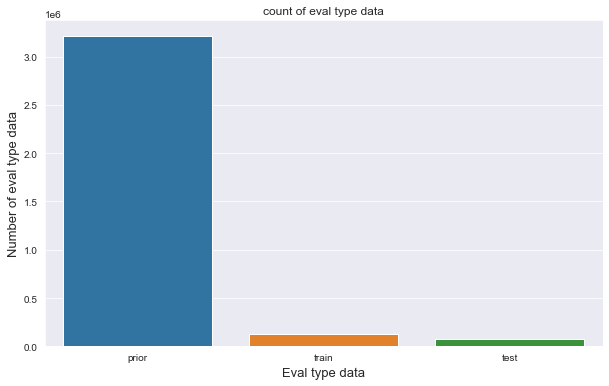

In [19]:
sns.set_style('darkgrid')
f, ax = plt.subplots(figsize=(10, 6))
plt.xticks(rotation='vertical')
ax = sns.countplot(x='eval_set', data=orders)
plt.title("count of eval type data")
plt.ylabel('Number of eval type data', fontsize=13)
plt.xlabel('Eval type data', fontsize=13)
plt.xticks(rotation='horizontal')
plt.show()

#### conclusion
* prior dataset have more than 3 million rows
* train have more than 0.1 million rows
* test have less than 0.1 million rows

### orders number by days

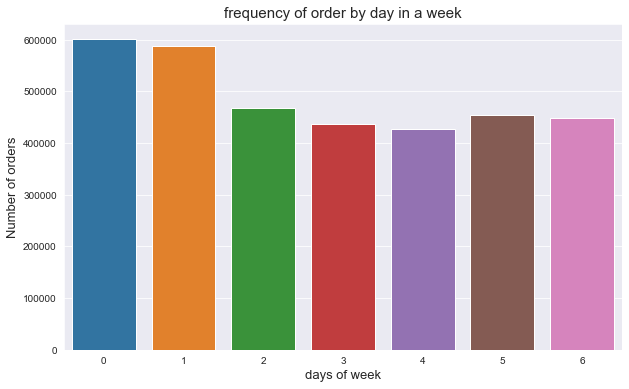

In [20]:
sns.set_style('darkgrid')
f, ax = plt.subplots(figsize=(10, 6))
ax = sns.countplot(x='order_dow', data=orders)
plt.title('frequency of order by day in a week', fontsize=15)
plt.ylabel('Number of orders', fontsize=13)
plt.xlabel('days of week', fontsize=13)
plt.xticks(rotation='horizontal')
plt.show()

#### analysis
* day 0 and 1(sunday and monday) have the most order in a week
* the number keep decreasing in the middle of week and rising in the end of week
#### conclusion
* sunday and monday are the days with the highest number of orders

### orders number by hours

Text(0.5, 1.0, 'Frequency of Order by Hour')

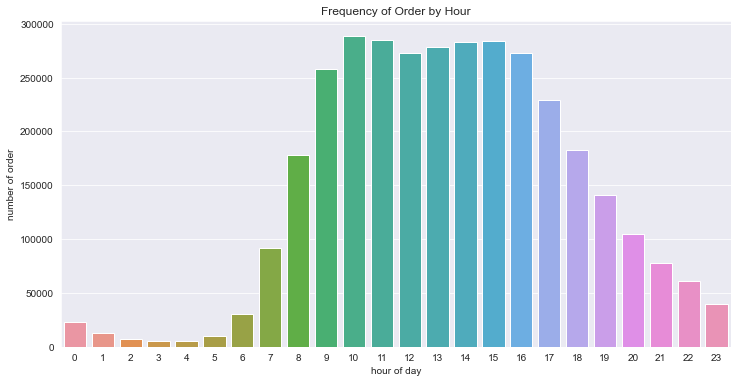

In [21]:
sns.set_style('darkgrid')
f, ax=plt.subplots(figsize=(12,6))
ax=sns.countplot(x="order_hour_of_day",data=orders)
plt.xlabel("hour of day")
plt.ylabel("number of order")
plt.title("Frequency of Order by Hour")

#### conclusion
* Most orders occur in the morning-afternoon, the number increases starting at 7 in the morning and reaches a peak at 10-15, then decreases.

### Order Number by Hour in Week

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5]),
 <a list of 24 Text major ticklabel objects>)

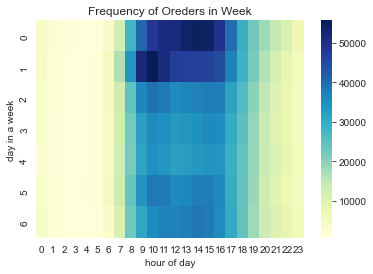

In [22]:
dayhourmerge=orders.groupby(["order_dow","order_hour_of_day"])["order_number"].aggregate('count').reset_index()
dayhourmerge=dayhourmerge.pivot("order_dow","order_hour_of_day","order_number")

sns.heatmap(dayhourmerge,cmap="YlGnBu")
plt.xlabel("hour of day")
plt.ylabel("day in a week")
plt.title("Frequency of Oreders in Week")
plt.xticks(rotation="horizontal")


#### conclusion
* based on hours dan day in a week,  orders occur in the morning-afternoon and the most day woth order is sunday and monday

### Product Reordered Count

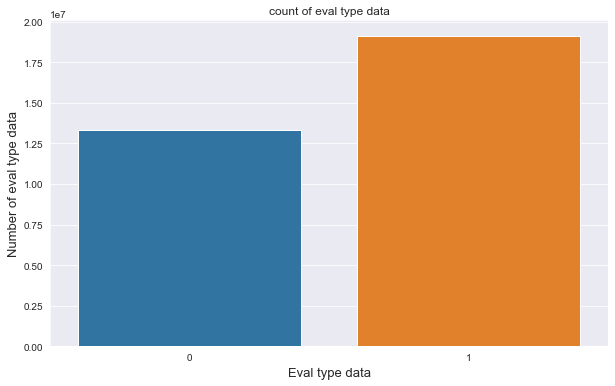

In [23]:
sns.set_style('darkgrid')
f, ax = plt.subplots(figsize=(10, 6))
plt.xticks(rotation='vertical')
ax = sns.countplot(x='reordered', data=order_products_prior)
plt.title("count of eval type data")
plt.ylabel('Number of eval type data', fontsize=13)
plt.xlabel('Eval type data', fontsize=13)
plt.xticks(rotation='horizontal')
plt.show()

#### conclusion
* there are more reorder data

### Department Reorder Ratio

In [24]:
order_product_merge = pd.merge(order_products_prior, products, how="inner", on=["product_id"])
dep_merge=pd.merge(order_product_merge,departments, how="inner", on=["department_id"])
dep_merge.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department
0,2,33120,1,1,Organic Egg Whites,86,16,dairy eggs
1,26,33120,5,0,Organic Egg Whites,86,16,dairy eggs
2,120,33120,13,0,Organic Egg Whites,86,16,dairy eggs
3,327,33120,5,1,Organic Egg Whites,86,16,dairy eggs
4,390,33120,28,1,Organic Egg Whites,86,16,dairy eggs


In [27]:
grouped=dep_merge.groupby(["department"])["reordered"].aggregate("mean").reset_index()
grouped=grouped.sort_values(by='reordered',ascending=False)

Text(0.5, 1.0, 'Department Reordered Ratio')

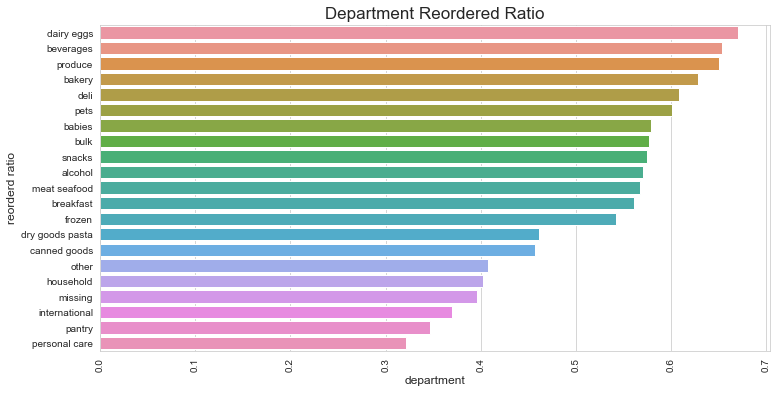

In [28]:
sns.set_style('whitegrid')
f, ax=plt.subplots(figsize=(12,6))
ax=sns.barplot(x="reordered",y="department", data=grouped)
plt.xticks(rotation="vertical")
plt.xlabel("department",fontsize=12)
plt.ylabel("reorderd ratio",fontsize=12)
plt.title("Department Reordered Ratio", fontsize=17)

### Department Reordered Ratio

In [64]:
order_product_merge
aisle_merge=pd.merge(order_product_merge,aisles,how='inner', left_on='aisle_id',right_on='id_aisle')

In [69]:
aisle_grouped=aisle_merge.groupby(["aisle"])["reordered"].aggregate("mean").reset_index()
aisle_grouped=aisle_grouped.sort_values(by='reordered',ascending=False)

MemoryError: Unable to allocate 1.69 GiB for an array with shape (7, 32434489) and data type int64

NameError: name 'aisle_grouped' is not defined

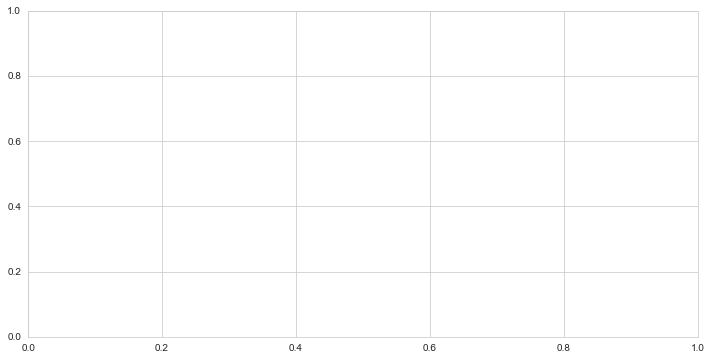

In [68]:
sns.set_style('whitegrid')
f, ax=plt.subplots(figsize=(12,6))
ax=sns.barplot(x="reordered",y="aisle", data=aisle_grouped)
plt.xticks(rotation="vertical")
plt.xlabel("department",fontsize=12)
plt.ylabel("reorderd ratio",fontsize=12)
plt.title("aisle Reordered Ratio", fontsize=17)

#### Analysis
* department that have high reorder ratio mostly is food & beverages group(egg, bakery etc)
* This could be because these departments contain daily needs product

#### conclusion
* food and beverages group are highly recomended for reorder prediction

### Product Reordered Ratio

In [29]:
grouped2=dep_merge.groupby(["product_name"])["reordered"].aggregate("mean").reset_index()
grouped2=grouped2.sort_values(by='reordered',ascending=False).iloc[0:5]

Text(0.5, 1.0, 'Top Product Reordered Ratio')

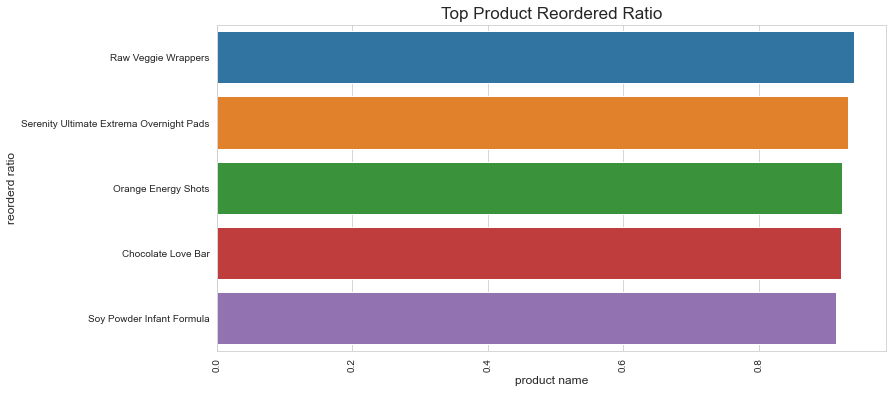

In [30]:
sns.set_style('whitegrid')
f, ax=plt.subplots(figsize=(12,6))
ax=sns.barplot(x="reordered",y="product_name", data=grouped2)
plt.xticks(rotation="vertical")
plt.xlabel("product name",fontsize=12)
plt.ylabel("reorderd ratio",fontsize=12)
plt.title("Top Reordered Product Ratio", fontsize=17)

### Day Since Prior Order

Text(0.5, 1.0, 'Number of Order Since Prior Order')

<Figure size 864x576 with 0 Axes>

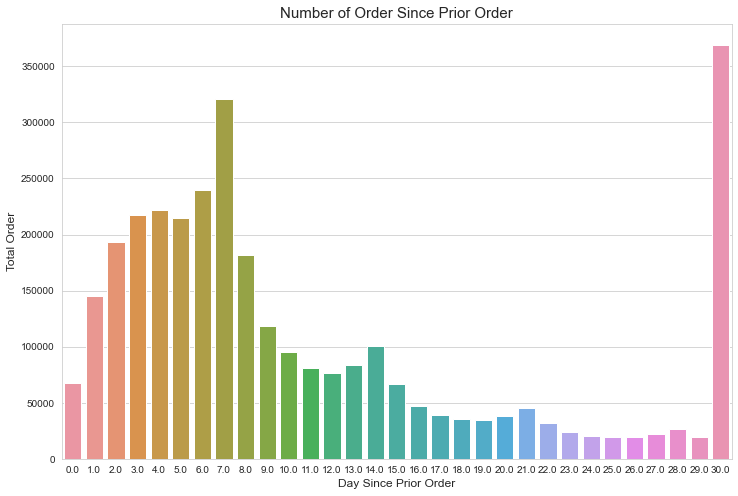

In [31]:
plt.figure(figsize=(12,8))
f, ax=plt.subplots(figsize=(12,8))
sns.countplot(x="days_since_prior_order",data=orders)
plt.xlabel("Day Since Prior Order",size=12)
plt.ylabel("Total Order",size=12)
plt.title("Number of Order Since Prior Order",size=15)

#### analysis

### Order Number by Each Number

In [32]:
cus_count=orders.user_id.value_counts()
cus_count=cus_count.value_counts()

In [47]:
cus_count[100]

1374

Text(0.5, 1.0, 'Orders made by each customer')

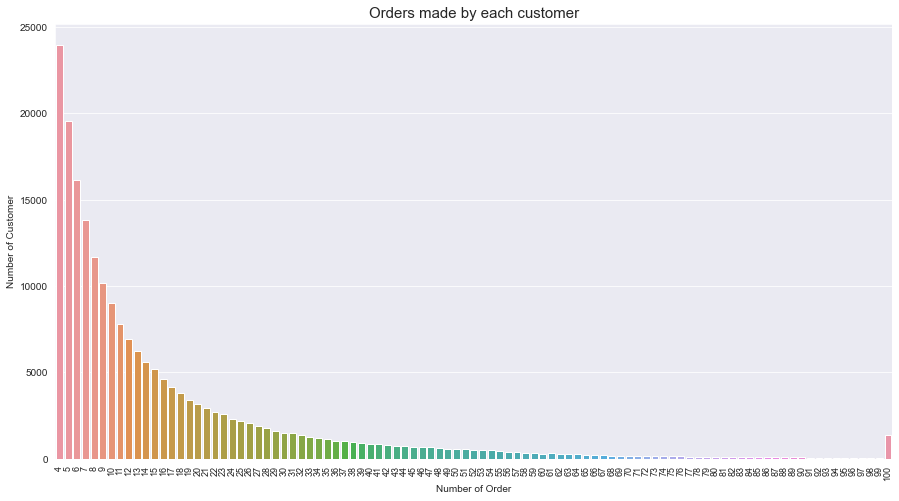

In [33]:
sns.set_style("darkgrid")
f, ax=plt.subplots(figsize=(15,8))
ax=sns.barplot(x=cus_count.index,y=cus_count.values)
plt.xticks(rotation="vertical",fontsize=9)
plt.xlabel("Number of Order")
plt.ylabel("Number of Customer")
plt.title("Orders made by each customer",size=15)

#### conclusion
* mostly customer placed 4 order
* the number constantly decrease as the number of order increase
* there are around 1000 customer who placed 100 orders

### Top Grossing Product

In [36]:
dfp=pd.merge(order_products_prior,products,on="product_id",how="left")
prd_cnt=dfp.product_name.value_counts().reset_index()
prd_cnt.columns = ['product_name', 'frequency_count']
prd_cnt.head(15)

,product_name,frequency_count
0,Banana,472565
1,Bag of Organic Bananas,379450
2,Organic Strawberries,264683
3,Organic Baby Spinach,241921
4,Organic Hass Avocado,213584
5,Organic Avocado,176815
6,Large Lemon,152657
7,Strawberries,142951
8,Limes,140627
9,Organic Whole Milk,137905


In [39]:
## mostly fruits, lets see the aisles

In [40]:
dfp.rename({'aisle_id': 'id_aisle'}, axis=1, inplace=True)
aisles.rename({'aisle_id': 'id_aisle'}, axis=1, inplace=True)
dfp=pd.merge(dfp, aisles,on="id_aisle",how="left")

In [42]:
asl_cnt=dfp.aisle.value_counts().reset_index()
asl_cnt.columns = ['aisle_name', 'frequency_count']
asl_cnt=asl_cnt.head(15)

Text(0.5, 1.0, 'Top Gross Aisle')

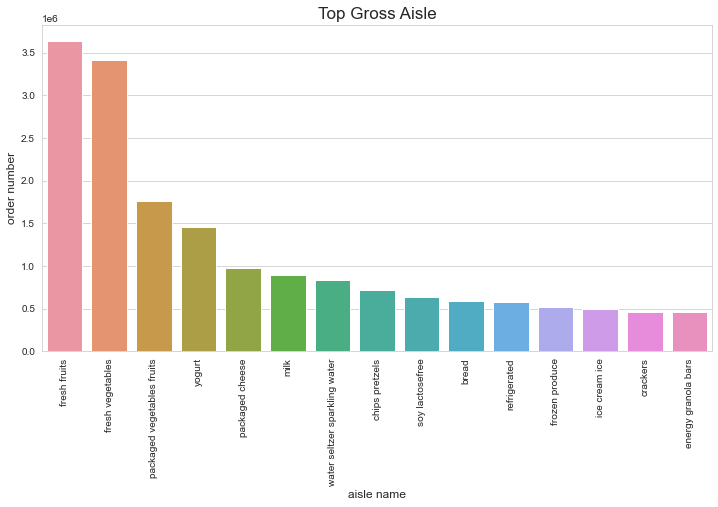

In [43]:
sns.set_style('whitegrid')
f, ax=plt.subplots(figsize=(12,6))
ax=sns.barplot(x="aisle_name",y="frequency_count", data=asl_cnt)
plt.xticks(rotation="vertical")
plt.xlabel("aisle name",fontsize=12)
plt.ylabel("order number",fontsize=12)
plt.title("Top Gross Aisle", fontsize=17)

In [45]:
orders.head(10)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0
6,550135,1,prior,7,1,9,20.0
7,3108588,1,prior,8,1,14,14.0
8,2295261,1,prior,9,1,16,0.0
9,2550362,1,prior,10,4,8,30.0


In [71]:
orders

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
...,...,...,...,...,...,...,...
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0
3421081,2977660,206209,prior,13,1,12,7.0
